In [1]:
import matplotlib.pyplot as plt
from utils import data_utils
%matplotlib inline
import cv2
import numpy as np

In [2]:
im0 = data_utils.ImageData(1)

In [3]:
im0.get_image_path()

{'3': '/Users/rogerjiang/code/dstl_unet/data/three_band/6120_2_2.tif',
 'A': '/Users/rogerjiang/code/dstl_unet/data/sixteen_band/6120_2_2_A.tif',
 'M': '/Users/rogerjiang/code/dstl_unet/data/sixteen_band/6120_2_2_M.tif',
 'P': '/Users/rogerjiang/code/dstl_unet/data/sixteen_band/6120_2_2_P.tif'}

In [4]:
im0.load_image()

In [5]:
im0.image_size

(3348, 3403)

In [6]:
im0._xymax

[0.009188, -0.0090400000000000012]

In [7]:
im0.three_band_image.shape

(3348, 3403, 3)

In [8]:
im0.create_label()

In [9]:
im0.label.shape

(3348, 3403)

In [10]:
im0.three_band_image.shape

(3348, 3403, 3)

In [11]:
im0.sixteen_band_image.shape

(3348, 3403, 16)

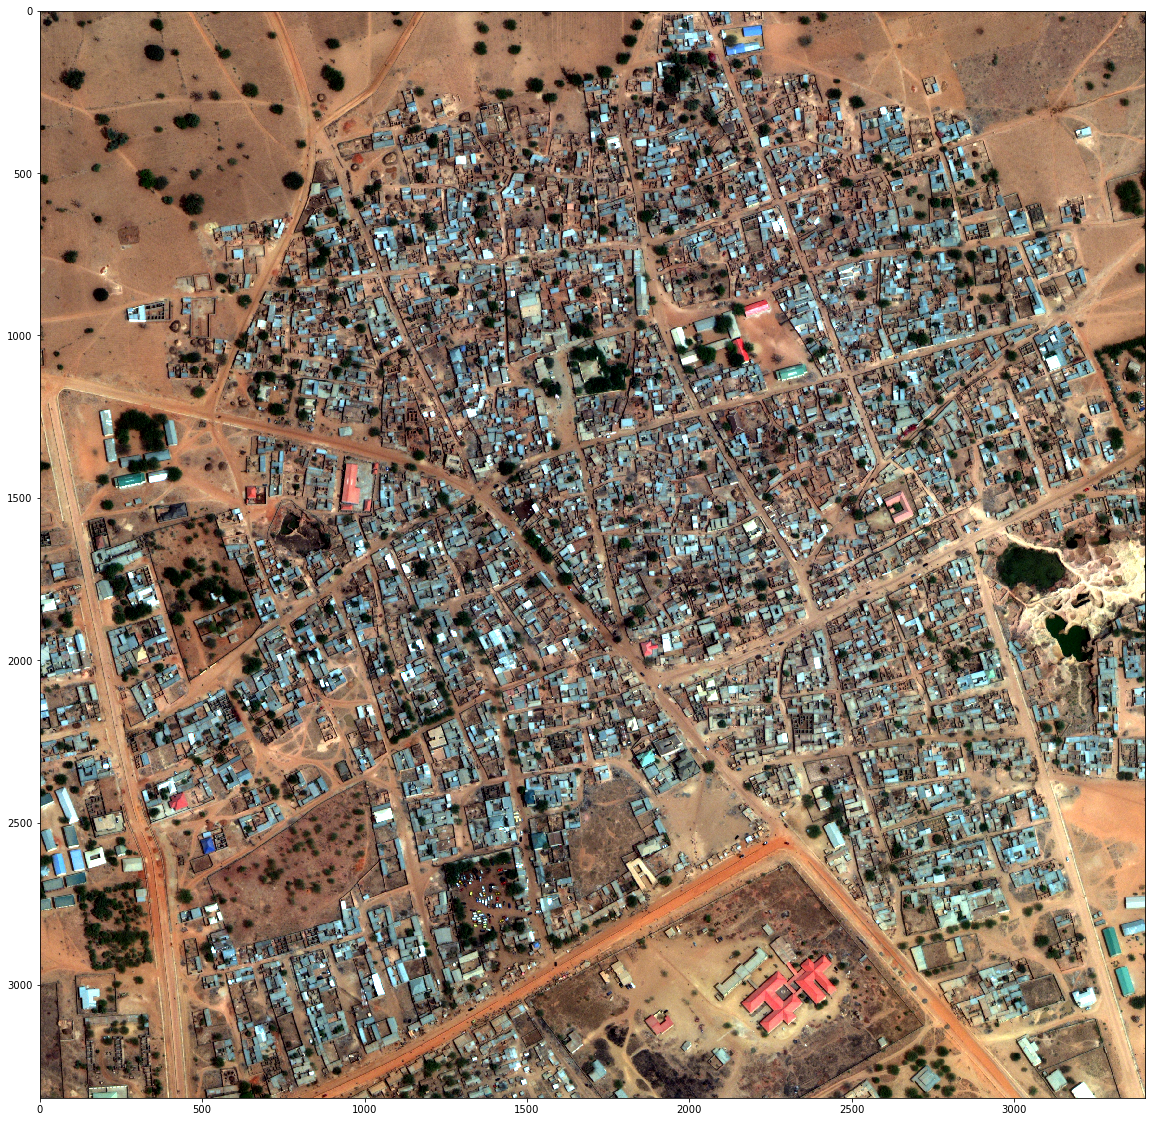

In [14]:
plt.figure(figsize=[20,20])
plt.imshow(scale_percentile(im0.three_band_image))

In [13]:
def scale_percentile(matrix):
    """Fixes the pixel value range to 2%-98% original distribution of values"""
    orig_shape = matrix.shape
    matrix = np.reshape(matrix, [matrix.shape[0]*matrix.shape[1], 3]).astype(float)
    
    # Get 2nd and 98th percentile
    mins = np.percentile(matrix, 1, axis=0)
    maxs = np.percentile(matrix, 99, axis=0) - mins
    
    matrix = (matrix - mins[None,:])/maxs[None,:]
    matrix = np.reshape(matrix, orig_shape)
    matrix = matrix.clip(0,1)
    return matrix

In [15]:
im0.imageId

'6120_2_2'

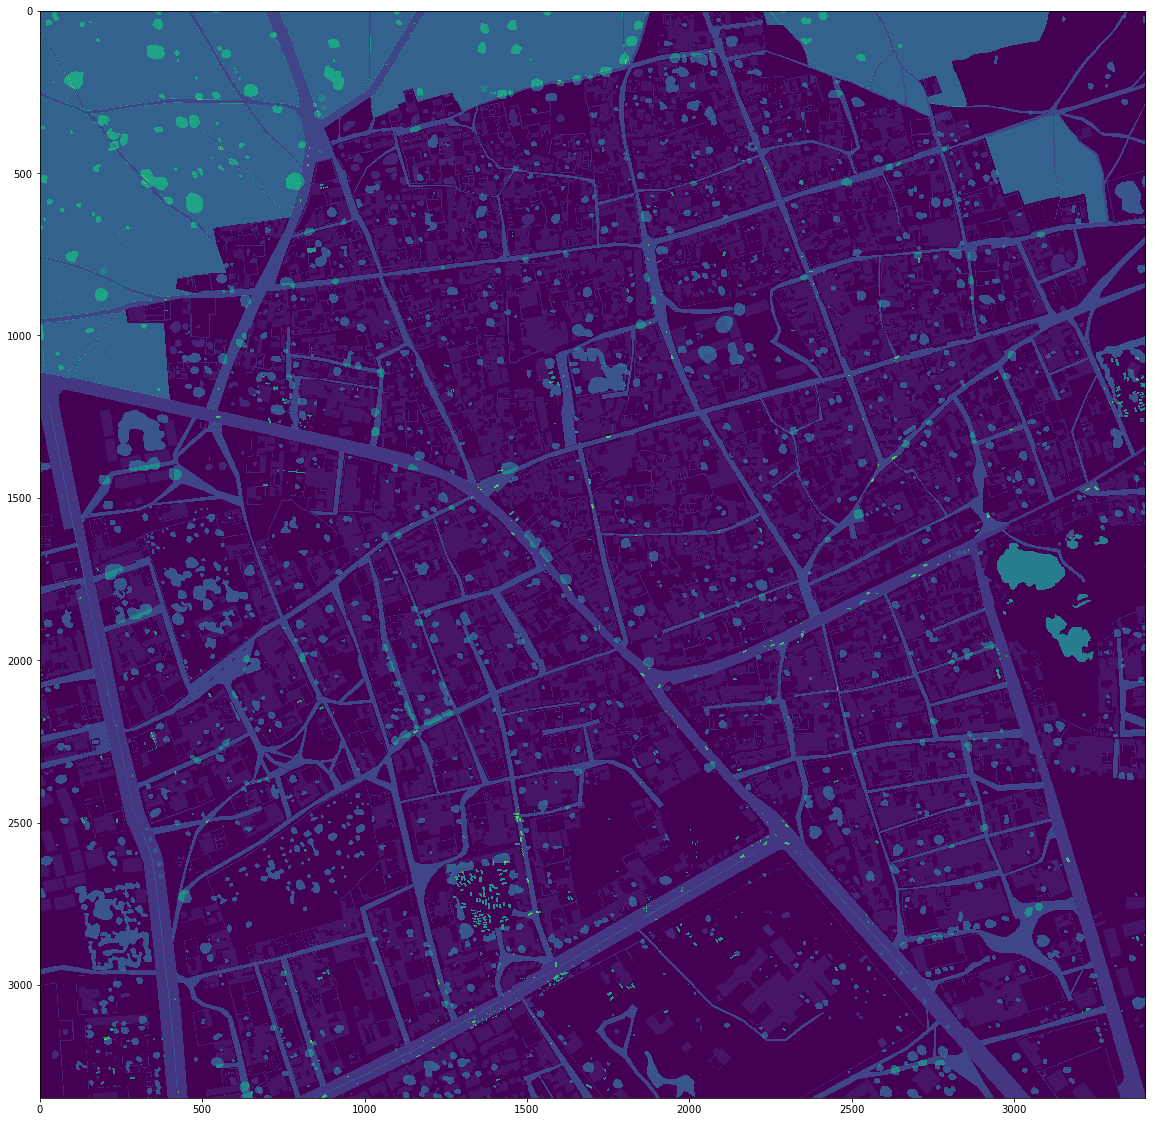

In [16]:
plt.figure(figsize=[20,20])
plt.imshow(im0.label)

In [17]:
im0._xymax

[0.009188, -0.0090400000000000012]

In [18]:
im0.image_size

(3348, 3403)

In [19]:
data_utils.CLASSES

{1: 'Bldg',
 2: 'Struct',
 3: 'Road',
 4: 'Track',
 5: 'Trees',
 6: 'Crops',
 7: 'Fast H20',
 8: 'Slow H20',
 9: 'Truck',
 10: 'Car'}

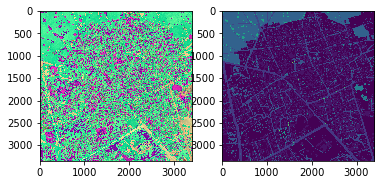

In [20]:
fig, axs = plt.subplots(1,2)

axs[0].imshow(im0.three_band_image)
axs[1].imshow(im0.label)

In [21]:
data_utils.all_train_names

array(['6040_2_2', '6120_2_2', '6120_2_0', '6090_2_0', '6040_1_3',
       '6040_1_0', '6100_1_3', '6010_4_2', '6110_4_0', '6140_3_1',
       '6110_1_2', '6100_2_3', '6150_2_3', '6160_2_1', '6140_1_2',
       '6110_3_1', '6010_4_4', '6170_2_4', '6170_4_1', '6170_0_4',
       '6060_2_3', '6070_2_3', '6010_1_2', '6040_4_4', '6100_2_2'], dtype=object)

In [60]:
for image_id in data_utils.all_train_names:
    mat_cui = np.load('../xj/results/image_alignment/{}_warp_matrix_a.npz'.format(image_id))
    mat = np.load('./utils/image_alignment/{}_warp_matrix_a.npz'.format(image_id))
    print mat_cui
    print mat
    print 

[[  1.00000000e+00  -1.76746777e-04  -2.56783943e+01]
 [  1.76746777e-04   1.00000000e+00  -6.55683231e+00]]
[[  1.00000000e+00  -1.76746777e-04  -2.56783943e+01]
 [  1.76746777e-04   1.00000000e+00  -6.55683231e+00]]

[[  1.00000000e+00   1.91675368e-04  -4.35085106e+01]
 [ -1.91675368e-04   1.00000000e+00  -6.23938847e+00]]
[[  1.00000000e+00   1.91675368e-04  -4.35085106e+01]
 [ -1.91675368e-04   1.00000000e+00  -6.23938847e+00]]

[[  9.99999821e-01  -6.24653883e-04  -1.72793543e+00]
 [  6.24653883e-04   9.99999821e-01  -4.74735403e+00]]
[[  9.99999821e-01  -6.24653883e-04  -1.72793543e+00]
 [  6.24653883e-04   9.99999821e-01  -4.74735403e+00]]

[[  9.99999940e-01   3.21416795e-04  -7.56904268e+00]
 [ -3.21416795e-04   9.99999940e-01   1.11992098e-01]]
[[  9.99999940e-01   3.21416795e-04  -7.56904268e+00]
 [ -3.21416795e-04   9.99999940e-01   1.11992098e-01]]

[[  9.99999940e-01   3.25472385e-04  -3.81716118e+01]
 [ -3.25472385e-04   9.99999940e-01  -2.65235949e+00]]
[[  9.99999940e

In [ ]:
image_untouched = im0.read_image()

In [ ]:
image_untouched['A'].shape

In [ ]:
import os

In [ ]:
filename = './image_alignment/comparison/{}/3_rescale.png'
f = os.makedirs(os.path.dirname(filename))

In [ ]:
f

In [ ]:
cv2.imwrite(open('./image_alignment/comparison/{}/3_rescale.png'.format(im0.imageId), 'w+'), im0.three_band_image[:100,:100,:])

In [ ]:
'./image_alignment/comparison/{}/3_rescale.png'.format(im0.imageId)

In [51]:
[nx, ny] = im0.image_size
xx = cv2.resize(im0.three_band_image, (ny, nx), interpolation=cv2.INTER_CUBIC)

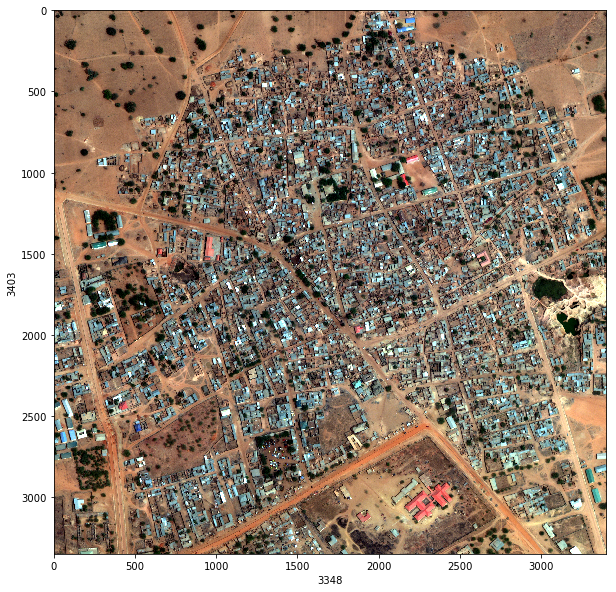

In [54]:
plt.figure(figsize=[10,10])
plt.imshow(scale_percentile(xx))
plt.xlabel(xx.shape[0])
plt.ylabel(xx.shape[1])

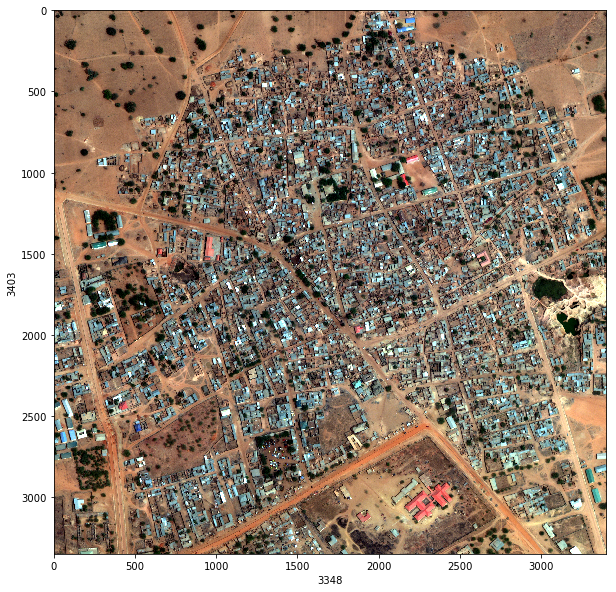

In [55]:
plt.figure(figsize=[10,10])
plt.imshow(scale_percentile(im0.three_band_image))
plt.xlabel(nx)
plt.ylabel(ny)